In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
import os

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
output = base_model.output

output = keras.layers.GlobalAveragePooling2D()(output)

output = keras.layers.Dense(128, activation="relu")(output)

prediction = keras.layers.Dense(10, activation="softmax")(output)

In [ ]:
model = keras.models.Model(base_model.input, prediction)

In [ ]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
# Set base directory and limit
base_dir = '/content/drive/MyDrive/Datasets/12 Animal /raw-img'
limit_per_class = 800

# Iterate through each class folder
for cls in os.listdir(base_dir):
    class_path = os.path.join(base_dir, cls)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # List all image files in the directory
        images = os.listdir(class_path)

        # Shuffle and keep only the limited number of images
        random.shuffle(images)
        images_to_keep = images[:limit_per_class]
        images_to_delete = images[limit_per_class:]

        # Delete images beyond the limit
        for img in images_to_delete:
            img_path = os.path.join(class_path, img)
            try:
                os.remove(img_path)
                print(f"Deleted {img_path}")
            except Exception as e:
                print(f"Error deleting {img_path}: {e}")

print("Completed limiting images per class.")

Streaming output truncated to the last 5000 lines.
Deleted /content/drive/MyDrive/Datasets/12 Animal /raw-img/cavallo/OIP-4EEoJ6XvS5iHM-hKrlXC_gHaFj.jpeg
Deleted /content/drive/MyDrive/Datasets/12 Animal /raw-img/cavallo/OIP-ldET-m9m45z0vVvA6QsReAHaFj.jpeg
Deleted /content/drive/MyDrive/Datasets/12 Animal /raw-img/cavallo/OIP-czVX-_7JLkwc02gqLVdAkwHaEz.jpeg
Deleted /content/drive/MyDrive/Datasets/12 Animal /raw-img/cavallo/OIP-NAVncQOVgugHmdvfEnFYAwHaJr.jpeg
Deleted /content/drive/MyDrive/Datasets/12 Animal /raw-img/cavallo/OIP-UyBt99cG7gPsGTdw5FgBRQHaFj.jpeg
Deleted /content/drive/MyDrive/Datasets/12 Animal /raw-img/cavallo/OIP-EOH0Y6GMn4WUzloQSu-qZAHaFj.jpeg
Deleted /content/drive/MyDrive/Datasets/12 Animal /raw-img/cavallo/OIP-kyNtkhDYZz3zDaVUtP0tPAHaFj.jpeg
Deleted /content/drive/MyDrive/Datasets/12 Animal /raw-img/cavallo/OIP-zGT7Rk-L-f6-GGitZMibqAHaGe.jpeg
Deleted /content/drive/MyDrive/Datasets/12 Animal /raw-img/cavallo/OIP-JUi52oJq6XWfrCR0KK9E_AAAAA.jpeg
Deleted /content/drive

In [ ]:
train_generator = datagen.flow_from_directory(
    directory=base_dir,
    class_mode="categorical",
    target_size=(224,224),
    batch_size=256,
    subset="training"
)

Found 6400 images belonging to 10 classes.


In [ ]:
test = datagen.flow_from_directory(
    directory=base_dir,
    class_mode="categorical",
    target_size=(224,224),
    batch_size=256,
    subset="validation"
)

Found 1600 images belonging to 10 classes.


In [ ]:
import numpy as np

In [ ]:
np.argmax()

7

In [ ]:
classes = [x for x in train_generator.class_indices.keys()]
len(classes)
classes[7]

'pecora'

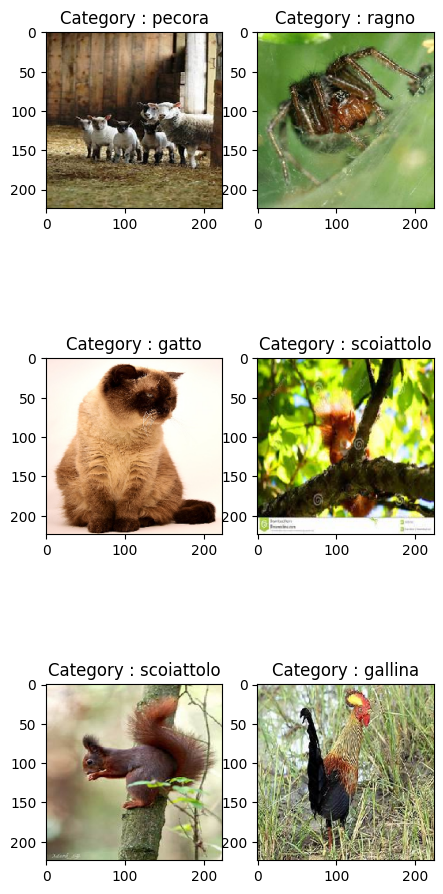

In [ ]:
plt.figure(figsize=(5,12))
for x in range(6):
  plt.subplot(3,2,x + 1)
  plt.title(f"Category : {classes[np.argmax(train_generator[0][1][x])]}")
  plt.imshow(train_generator[0][0][x])
  plt.grid(False)

In [ ]:
report = model.fit(train_generator, validation_data=test, epochs=10, batch_size=512)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.3666 - loss: 1.9534 - val_accuracy: 0.8556 - val_loss: 0.7016
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9032 - loss: 0.5485 - val_accuracy: 0.8950 - val_loss: 0.4186
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9473 - loss: 0.2839 - val_accuracy: 0.9044 - val_loss: 0.3433
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9640 - loss: 0.1872 - val_accuracy: 0.9094 - val_loss: 0.3109
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9747 - loss: 0.1389 - val_accuracy: 0.9156 - val_loss: 0.2891
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9812 - loss: 0.1136 - val_accuracy: 0.9231 - val_loss: 0.2730
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9848 - loss: 0.0898 - val_accuracy: 0.9262 - val_loss: 0.2654
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9915 - loss: 0.0727 - val_accuracy: 0.9312 - val_loss: 0.2567
Ep

In [ ]:
test[0][0][0].shape

(224, 224, 3)

In [ ]:
model.predict(test[0][0])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[5.16761247e-05, 1.60082891e-05, 3.37533152e-06, ...,
        1.16081865e-05, 5.45756848e-06, 1.35056223e-04],
       [1.63306296e-03, 3.14810267e-03, 1.17881212e-03, ...,
        4.30339132e-04, 1.73326043e-04, 6.08677510e-04],
       [9.96965587e-01, 3.12170800e-04, 1.78238362e-04, ...,
        4.67195241e-05, 3.35883058e-04, 5.44132956e-04],
       ...,
       [3.80427635e-04, 7.07402418e-04, 9.95682120e-01, ...,
        2.03352556e-05, 1.08615292e-04, 9.26399371e-05],
       [1.45815592e-03, 5.47273259e-04, 1.65950030e-03, ...,
        1.19829224e-03, 1.37983428e-04, 9.91499168e-04],
       [3.64051550e-03, 1.07219359e-02, 9.60711837e-01, ...,
        1.19162165e-02, 7.75162305e-04, 3.72991286e-04]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


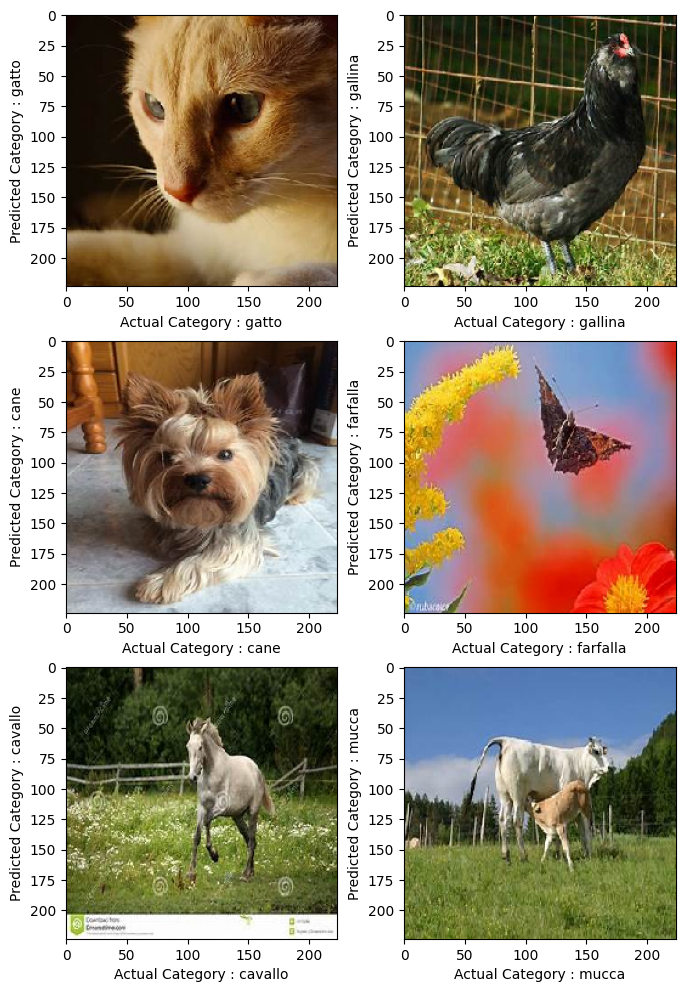

In [76]:
plt.figure(figsize=(8,12))
for x in range(6):
  plt.subplot(3,2,x + 1)
  plt.xlabel(f"Actual Category : {classes[np.argmax(test[0][1][x])]}")

  image = np.expand_dims(test[0][0][x], axis=0)
  plt.ylabel(f"Predicted Category : {classes[np.argmax(model.predict(image))]}")
  plt.imshow(test[0][0][x])


In [ ]:
plt.figure(figsize=(5,12))

plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot()